In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multi_group_dorm_simulation import MultiGroupDormSimulation
from load_params import load_params

In [2]:
def init_multi_group_sim(total_groups, 
                         total_population, 
                         total_contacts, 
                         within_group_contact_fraction,
                         use_adaptive_protocol=False,
                         max_time_to_big_test=None):
   
    if use_adaptive_protocol:
        quarantine_test_fraction=1.0
    else:
        quarantine_test_fraction = 2/7
    
    
    return MultiGroupDormSimulation(
        num_dorms = total_groups,
        dorm_population = total_population,
        non_dorm_population = 0,
        intra_dorm_contacts = total_contacts * within_group_contact_fraction,
        inter_dorm_contacts = total_contacts * (1 - within_group_contact_fraction),
        intra_non_dorm_contacts = 0,
        inter_non_dorm_contacts = 0,
        dorm_test_rate = 2/7,
        non_dorm_test_rate = 0,
        quarantine_delay=max_time_to_big_test,
        quarantine_contacts_multiplier=1,
        quarantine_test_fraction = quarantine_test_fraction,
        safe_days_until_unquarantine=0,
        dorm_outside_infection_p=None,
        initial_dorm_prevalence=0.1,
        base_config='../src/simulations_v2/params/baseline_testing/steady_state/nominal/ug_dorm.yaml')

In [ ]:
nreps = 20

adaptive_results_4 = []
for _ in range(nreps):
    sim = init_multi_group_sim(100,10000,10,0.5,True,4)
    lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)
    adaptive_results_4.append((lockdown_statuses, sim_df))
    
adaptive_results_2 = []
for _ in range(nreps):
    sim = init_multi_group_sim(100,10000,10,0.5,True,2)
    lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)
    adaptive_results_2.append((lockdown_statuses, sim_df))
    
non_adaptive_results = []
for _ in range(nreps):
    sim = init_multi_group_sim(100,10000,10,0.5,False,2)
    lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)
    non_adaptive_results.append((lockdown_statuses, sim_df))

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

just ran step() with these quarantines: {41}
just ran step() with these quarantines: {29}
just ran step() with these quarantines: {67, 71}
just ran step() with these quarantines: {55}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {28}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {55}
just ran step() with these quarantines: set()
just ran step() with these quarantin

In [13]:
len(non_adaptive_results)

20

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([9.0000e+00, 1.0081e+03, 2.0072e+03, 3.0063e+03, 4.0054e+03,
        5.0045e+03, 6.0036e+03, 7.0027e+03, 8.0018e+03, 9.0009e+03,
        1.0000e+04]),
 <a list of 10 Patch objects>)

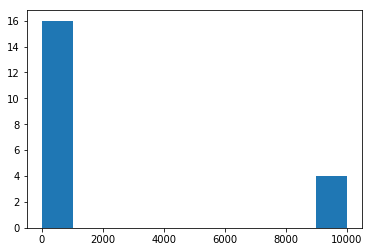

In [28]:
cum_infections = []
for idx in range(nreps):
    cum_infections.append(get_cum_infections(non_adaptive_results[idx][1]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cum_infections)

(array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([   13. ,  1011.7,  2010.4,  3009.1,  4007.8,  5006.5,  6005.2,
         7003.9,  8002.6,  9001.3, 10000. ]),
 <a list of 10 Patch objects>)

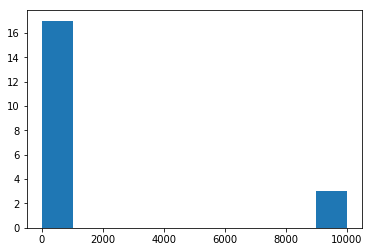

In [29]:
cum_infections = []
for idx in range(nreps):
    cum_infections.append(get_cum_infections(adaptive_results_4[idx][1]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cum_infections)

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([6.0000e+00, 1.0054e+03, 2.0048e+03, 3.0042e+03, 4.0036e+03,
        5.0030e+03, 6.0024e+03, 7.0018e+03, 8.0012e+03, 9.0006e+03,
        1.0000e+04]),
 <a list of 10 Patch objects>)

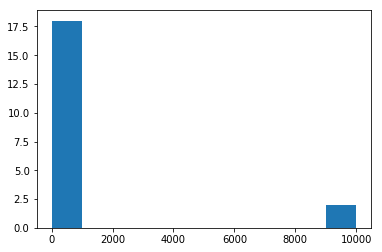

In [30]:
cum_infections = []
for idx in range(nreps):
    cum_infections.append(get_cum_infections(adaptive_results_2[idx][1]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cum_infections)

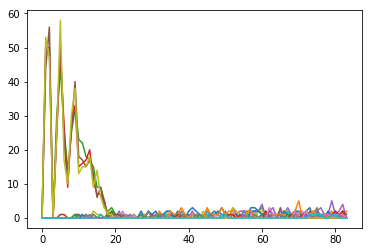

In [31]:
for idx in range(nreps):
    trajectory = non_adaptive_results[idx][0]
    plt.plot(range(len(trajectory)), trajectory)

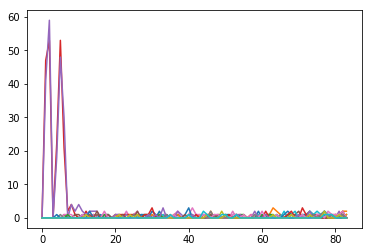

In [32]:
for idx in range(nreps):
    trajectory = adaptive_results_2[idx][0]
    plt.plot(range(len(trajectory)), trajectory)

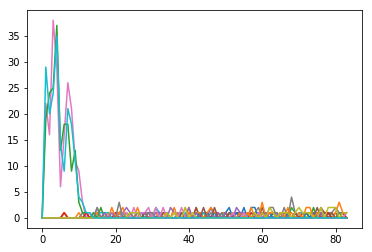

In [33]:
for idx in range(nreps):
    trajectory = adaptive_results_4[idx][0]
    plt.plot(range(len(trajectory)), trajectory)

In [17]:
type(non_adaptive_results[0][0][-1])

int

In [34]:
adaptive_results_1 = []
for _ in range(nreps):
    sim = init_multi_group_sim(100,10000,10,0.5,True,1)
    lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)
    adaptive_results_2.append((lockdown_statuses, sim_df))
    

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {2}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {61}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {59}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines

just ran step() with these quarantines: {77}
just ran step() with these quarantines: {18, 10}
just ran step() with these quarantines: {19}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {99}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {99}
just ran step() with these quarantines: {83}
just ran step() with these quarantines: {17, 65}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {77}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {73, 42}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {95}
just ran step() with these quara

just ran step() with these quarantines: {37}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {41}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantin

just ran step() with these quarantines: {41}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {5}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {5}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {0}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: s

just ran step() with these quarantines: {55}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {88}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {14}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {6}
just ran step() with these quarantines: {88}
just ran step() with these quarantines: {28}
just ran step() with these quarantines: {0}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {92}
just ran step() with these quarantines: {41}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {73}
just ran step() with these quarantines: set()
just ran step() with these quarantines: {41, 12}
just ran step() with these quarantines: set

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {90}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quaranti

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {0, 1, 2, 3, 4, 5, 6, 7

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: {45}
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quaranti

In [3]:
sim = init_multi_group_sim(100,10000,10,0.5,True,4)

In [4]:
lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

In [9]:
sim.sims[1].pop_size

100

In [5]:
sim_df['S']

0     10000
1      9995
2      9990
3      9986
4      9985
5      9981
6      9981
7      9981
8      9978
9      9979
10     9979
11     9974
12     9971
13     9970
14     9970
15     9971
16     9970
17     9970
18     9970
19     9973
20     9974
21     9970
22     9968
23     9966
24     9968
25     9966
26     9965
27     9966
28     9961
29     9960
      ...  
55     9936
56     9934
57     9933
58     9932
59     9936
60     9936
61     9934
62     9926
63     9922
64     9916
65     9920
66     9920
67     9922
68     9923
69     9914
70     9918
71     9910
72     9908
73     9908
74     9905
75     9905
76     9904
77     9902
78     9903
79     9906
80     9905
81     9903
82     9906
83     9905
84     9904
Name: S, Length: 85, dtype: object

In [14]:
np.random.binomial(1,0.1)

0

In [8]:
sim2 = init_multi_group_sim(100,10000,10,0.5,False,4)

In [9]:
lockdown_statuses2, sim_df2 = sim2.run_new_trajectory(12*7)

just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarantines: set()
just ran step() with these quarant

In [10]:
sim_df2['S']

0     10000
1      9998
2      9995
3      9992
4      9988
5      9983
6      9983
7      9979
8      9977
9      9977
10     9975
11     9974
12     9970
13     9966
14     9964
15     9962
16     9964
17     9962
18     9963
19     9963
20     9959
21     9957
22     9959
23     9957
24     9955
25     9960
26     9960
27     9962
28     9963
29     9964
      ...  
55     9927
56     9924
57     9921
58     9921
59     9919
60     9920
61     9915
62     9911
63     9909
64     9904
65     9906
66     9902
67     9900
68     9893
69     9894
70     9895
71     9894
72     9895
73     9896
74     9898
75     9897
76     9897
77     9888
78     9891
79     9886
80     9885
81     9890
82     9893
83     9897
84     9900
Name: S, Length: 85, dtype: object

In [7]:
i[-1]

1

In [20]:
def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def total_infections(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs:
        total += get_cum_infections(sim_df)
    return total

def total_hosp(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs:
        total += get_cum_hosp(sim_df)
    return total

def cornell_infections(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs[:-1]:
        total += get_cum_infections(sim_df)
    return total

def cornell_hosp(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs[:-1]:
        total += get_cum_hosp(sim_df)
    return total

def run_multigroup_sim(sim, T):
    lockdown_statuses, sim_df = sim.run_new_trajectory(12*7)
    popsize = sim.get_total_population()
    infection_counts = sim_df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1)
    inf_list = list()
    hosp_list = list()
    for group in sim.sims:
        df = group.sim_df
        inf_list.append(get_cum_infections(df))
        hosp_list.append(get_cum_hosp(df))
    return inf_list, hosp_list, lockdown_statuses, list(infection_counts)

def run_multiple_trajectories(sim, T, n):
    inf_matrix = list()
    hosp_matrix = list()
    lockdown_trajectories = []
    infection_trajectories = []
    for _ in range(n):
        inf, hosp, lockdowns, infections = run_multigroup_sim(sim, T)
        inf_matrix.append(inf)
        hosp_matrix.append(hosp)
        lockdown_trajectories.append(lockdowns)
        infection_trajectories.append(infections)
    return inf_matrix, hosp_matrix, lockdown_trajectories, infection_trajectories

In [8]:
li

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [2]:
np.random.uniform(0,5)

1.1320846088342411

In [4]:
1.2 * 10**(-5)

1.2e-05

In [5]:
def sample_dorm_infection_data(contacts_per_day, 
                               base_test_rate,
                               high_alert_test_rate,
                               safe_days_to_exit_high_alert, 
                               use_outside_infections,
                               procnum, return_dict):
    high_alert_contacts_per_day = contacts_per_day
    config={'test_protocol_QFNR': 0.46,
           'daily_outside_infection_p': 1.2e-05}
    dorm_sim = SingleDormSimulation(dorm_population=100,
                                    dorm_test_rate=base_test_rate,
                                    high_alert_dorm_test_rate=high_alert_test_rate,
                                    contacts_per_day=contacts_per_day,
                                    high_alert_contacts_per_day=high_alert_contacts_per_day,
                                    safe_days_to_exit_high_alert=safe_days_to_exit_high_alert,
                                    use_default_outside_infection_p=use_outside_infections,
                                    config=config,
                                    initial_cases=1)
    all_trajectories_days_controlled, \
    all_trajectories_total_infected, \
    all_trajectories_free_infected_counts, \
    all_trajectories_high_alert_statuses = dorm_sim.run_multiple_new_trajectories(ntrajectories=500)
    
    return_dict[procnum] = {
        'days_controlled': all_trajectories_days_controlled, 
        'total_infected': all_trajectories_total_infected, 
        'free_infected_counts': all_trajectories_free_infected_counts, 
        'high_alert_statuses': all_trajectories_high_alert_statuses
    }


    

In [6]:
import multiprocessing, time, itertools

manager = multiprocessing.Manager()
return_dict = manager.dict()

base_test_rates = [1/7, 2/7]
contacts_per_day = 8.3*1.25
high_test_rates = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
use_outside_infections = True
safe_days_to_exit_high_alert = [3, 5, 7, 9, 11]

jobs = []


start = time.time()
idx = 0
idx_mapping = {}
mapping_to_idx = {}
for base_rate, high_test_rate, safe_days in itertools.product(
                                                base_test_rates, 
                                                high_test_rates, 
                                                safe_days_to_exit_high_alert):
    p = multiprocessing.Process(target=sample_dorm_infection_data, 
                                args=(contacts_per_day, 
                                      base_rate,
                                      high_test_rate, 
                                      safe_days,
                                      use_outside_infections,
                                      idx,return_dict))
    idx_mapping[idx] = (base_rate, high_test_rate, safe_days)
    mapping_to_idx[(base_rate, high_test_rate, safe_days)] = idx
    jobs.append(p)
    p.start()
    idx += 1
    
non_adaptive_base_rates = [0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]
safe_days=3
for base_rate in non_adaptive_base_rates:
    p = multiprocessing.Process(target=sample_dorm_infection_data, 
                                args=(contacts_per_day, 
                                      base_rate,
                                      base_rate, 
                                      safe_days,
                                      use_outside_infections,
                                      idx,return_dict))
    idx_mapping[idx] = (base_rate, base_rate, safe_days)
    mapping_to_idx[(base_rate, base_rate, safe_days)] = idx
    jobs.append(p)
    p.start()
    idx += 1
    
for proc in jobs:
        proc.join()
end = time.time()
print("elapsed time: {:.2f} seconds".format(end-start))

elapsed time: 5935.12 seconds


In [28]:
# re-simulate with 1/7 base test-rate


base_test_rates = [1/7]
contacts_per_day = 8.3*1.25
high_test_rates = [1/7, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
use_outside_infections = True
safe_days_to_exit_high_alert = [3, 5, 7, 9, 11]




start = time.time()

for base_rate, high_test_rate, safe_days in itertools.product(
                                                base_test_rates, 
                                                high_test_rates, 
                                                safe_days_to_exit_high_alert):
    p = multiprocessing.Process(target=sample_dorm_infection_data, 
                                args=(contacts_per_day, 
                                      base_rate,
                                      high_test_rate, 
                                      safe_days,
                                      use_outside_infections,
                                      idx,return_dict))
    idx_mapping[idx] = (base_rate, high_test_rate, safe_days)
    mapping_to_idx[(base_rate, high_test_rate, safe_days)] = idx
    jobs.append(p)
    p.start()
    idx += 1
    
    
for proc in jobs:
        proc.join()
end = time.time()
print("elapsed time: {:.2f} seconds".format(end-start))

elapsed time: 2708.90 seconds


In [45]:
# re-simulate with larger range of non-adaptive base rates

start = time.time()

non_adaptive_base_rates = [0.14, 0.16, 0.18]
safe_days=3
for base_rate in non_adaptive_base_rates:
    p = multiprocessing.Process(target=sample_dorm_infection_data, 
                                args=(contacts_per_day, 
                                      base_rate,
                                      base_rate, 
                                      safe_days,
                                      use_outside_infections,
                                      idx,return_dict))
    idx_mapping[idx] = (base_rate, base_rate, safe_days)
    mapping_to_idx[(base_rate, base_rate, safe_days)] = idx
    jobs.append(p)
    p.start()
    idx += 1
    
for proc in jobs:
        proc.join()
end = time.time()
print("elapsed time: {:.2f} seconds".format(end-start))

elapsed time: 965.34 seconds


In [7]:
def get_avg_daily_tests_per_person(base_rate, high_rate, safe_days):
    idx = mapping_to_idx[(base_rate, high_rate, safe_days)]

    sum_avg_daily_tests = 0
    for trajectory_statuses in return_dict[idx]['high_alert_statuses']:
        high_alert_days = sum(trajectory_statuses)

        avg_daily_tests = high_alert_days * high_rate * 100 + (112 - high_alert_days) * base_rate * 100
        sum_avg_daily_tests += avg_daily_tests / 112

    return sum_avg_daily_tests / len(return_dict[idx]['high_alert_statuses']) / 100

In [8]:
def get_avg_infections(base_rate, high_rate, safe_days):
    idx = mapping_to_idx[(base_rate, high_rate, safe_days)]
    return np.mean(return_dict[idx]['total_infected'])

In [9]:
avg_daily_tests = {}

for (base_rate, high_rate, safe_days) in mapping_to_idx.keys():
    avg_daily_tests[(base_rate, high_rate, safe_days)] = get_avg_daily_tests_per_person(base_rate, high_rate, safe_days)

In [10]:
avg_infections = {}
avg_q50s = {}
for (base_rate, high_rate, safe_days) in mapping_to_idx.keys():
    avg_infections[(base_rate, high_rate, safe_days)] = get_avg_infections(base_rate, high_rate, safe_days)

In [11]:
min(avg_daily_tests.values()) * 6920

968.8000000000001

In [12]:
max(avg_daily_tests.values()) * 6920

2768.0

In [72]:
[key for key, val in avg_daily_tests.items() if val == max(avg_daily_tests.values())]

[(0.2857142857142857, 0.9, 11)]

In [14]:
max(avg_daily_tests.values())

0.4

In [17]:
test_range = np.linspace(0.14, 0.4, 20)

adaptive_20_baseline = []
adaptive_2_7_baseline = []
adaptive_1_7_baseline = []
non_adaptive = []

for max_test in test_range:
    adaptive_20_best = 101
    adaptive_2_7_best = 101
    non_adaptive_best = 101
    adaptive_1_7_best = 101
    
    for (base_rate, high_rate, safe_days) in mapping_to_idx:
        if avg_daily_tests[(base_rate, high_rate, safe_days)] <= max_test:
            avg_inf = avg_infections[(base_rate, high_rate, safe_days)]
            if high_rate == base_rate:
                if avg_inf < non_adaptive_best:
                    non_adaptive_best = avg_inf
            elif base_rate == 0.2:
                if avg_inf < adaptive_20_best:
                    adaptive_20_best = avg_inf
            elif base_rate == 2/7:
                if avg_inf < adaptive_2_7_best:
                    adaptive_2_7_best = avg_inf
            elif base_rate == 1/7:
                if avg_inf < adaptive_1_7_best:
                    adaptive_1_7_best = avg_inf
            else:
                print("couldn't identify type for {}".format((base_rate, high_rate, safe_days)))
    adaptive_20_baseline.append(adaptive_20_best)
    adaptive_2_7_baseline.append(adaptive_2_7_best)
    non_adaptive.append(non_adaptive_best)
    adaptive_1_7_baseline.append(adaptive_1_7_best)
    

In [49]:
avg_daily_tests[(1/7, 1/7, 3)]

0.1428571428571443

In [50]:
avg_infections[(1/7, 1/7, 3)]

62.0

In [51]:
avg_infections[(0.2, 0.2, 3)]

38.0

In [52]:
avg_daily_tests[(0.2, 0.2, 3)]

0.2

In [53]:
1/7

0.14285714285714285

Text(0.5,1,'Tradeoff Between Health Outcomes and Daily Testing Capacity\nfor Adaptive and Non-Adaptive Testing Protocols')

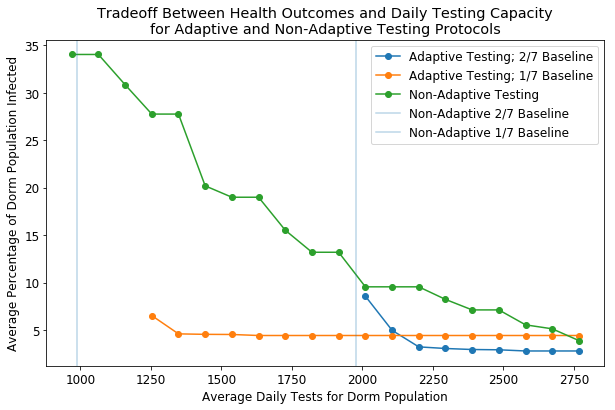

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})

scaled_test_range = [tests * 6920 for tests in test_range]

plt.figure(figsize=(10,6))
#plt.plot(scaled_test_range[4:], adaptive_20_baseline[4:], marker='o', label='Adaptive Testing; 1/5 Baseline')
plt.plot(scaled_test_range[11:], adaptive_2_7_baseline[11:], marker='o', label='Adaptive Testing; 2/7 Baseline')
plt.plot(scaled_test_range[3:], adaptive_1_7_baseline[3:], marker='o', label='Adaptive Testing; 1/7 Baseline')
plt.plot(scaled_test_range, non_adaptive, marker='o', label='Non-Adaptive Testing')

plt.axvline(2/7 * 6920, label='Non-Adaptive 2/7 Baseline', alpha=0.3)
#plt.axvline(1/5 * 6920, label='Non-Adaptive 1/5 Baseline', alpha=0.3)
plt.axvline(1/7 * 6920, label='Non-Adaptive 1/7 Baseline', alpha=0.3)
plt.legend()
plt.xlabel("Average Daily Tests for Dorm Population")
plt.ylabel("Average Percentage of Dorm Population Infected")
plt.title("Tradeoff Between Health Outcomes and Daily Testing Capacity\n"
         "for Adaptive and Non-Adaptive Testing Protocols")

In [78]:
adaptive_1_7_baseline[3]

14.100000000000023

In [22]:
[key for key, val in avg_infections.items() if val == adaptive_1_7_baseline[4]]

[(0.14285714285714285, 0.9, 3)]

In [23]:
avg_daily_tests[(0.14285714285714285, 0.9, 3)] * 6920

1303.2178265306122

In [24]:
avg_infections[(0.14285714285714285, 0.9, 3)]

4.602

In [25]:
avg_daily_tests[(0.28, 0.28, 3)] * 6920

1937.6000000000001

In [27]:
avg_infections[(0.28, 0.28, 3)]


9.558

Text(0.5,1,'90th Quantile of Total-Infection Distribution in 100-person Dorm\nover 16-Week Period with Zero Outside Infections')

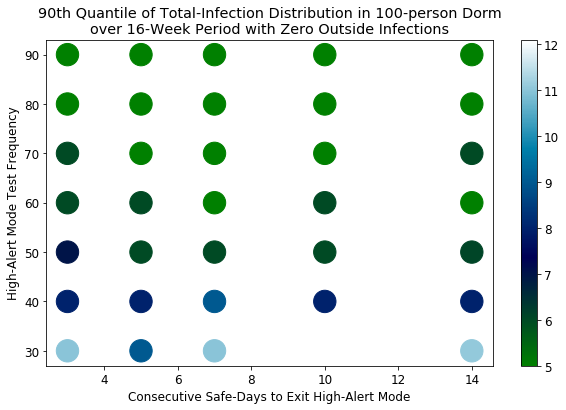

In [29]:
xs = []
ys = []
zs_inf = []
plt.rcParams.update({'font.size': 12})
for j, safe_days in enumerate(safe_days_to_exit_high_alert):
    for i, test_rate in enumerate(high_test_rates):
        xs.append(safe_days)
        ys.append(test_rate * 100)
        idx = mapping_to_idx[(contacts_per_day, base_test_rate, test_rate, safe_days)]
        zs_inf.append(np.quantile(return_dict[idx]['total_infected'], 0.9))

plt.figure(figsize=(10,6))
plt.scatter(xs, ys, c=zs_inf, s=500, cmap='ocean')
plt.colorbar()
plt.xlabel("Consecutive Safe-Days to Exit High-Alert Mode")
plt.ylabel("High-Alert Mode Test Frequency")
plt.title("90th Quantile of Total-Infection Distribution in 100-person Dorm\n"
          "over 16-Week Period with Zero Outside Infections")

Text(0.5,1,'Average Daily Tests Performed by Adaptive High-Alert Protocol')

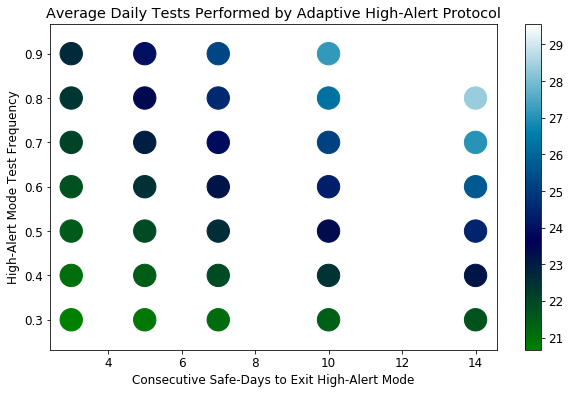

In [30]:
xs = []
ys = []
zs_test = []
for j, safe_days in enumerate(safe_days_to_exit_high_alert):
    for i, test_rate in enumerate(high_test_rates):
        idx = mapping_to_idx[(contacts_per_day, base_test_rate, test_rate, safe_days)]
           
        xs.append(safe_days)
        ys.append(test_rate)
        
        
        sum_avg_daily_tests = 0
        for trajectory_statuses in return_dict[idx]['high_alert_statuses']:
            high_alert_days = sum(trajectory_statuses)
        
            avg_daily_tests = high_alert_days * test_rate * 100 + (112 - high_alert_days) * base_test_rate * 100
            sum_avg_daily_tests += avg_daily_tests / 112
            
        zs_test.append(sum_avg_daily_tests / len(return_dict[idx]['high_alert_statuses']))
        
plt.figure(figsize=(10,6))
plt.scatter(xs, ys, c=zs_test, s=500, cmap='ocean')
plt.colorbar()
plt.xlabel("Consecutive Safe-Days to Exit High-Alert Mode")
plt.ylabel("High-Alert Mode Test Frequency")
plt.title("Average Daily Tests Performed by Adaptive High-Alert Protocol")

In [35]:
def get_best_params(max_test_capacity):
    idx = 0
    best_safe_days = 0
    best_test_rate = 0
    best_inf = 100
    
    for safe_days in safe_days_to_exit_high_alert:
        for test_rate in high_test_rates:
            
            if zs_test[idx] <= max_test_capacity:
                if zs_inf[idx] < best_inf:
                    best_inf = zs_inf[idx]
                    best_safe_days = safe_days
                    best_test_rate = test_rate
            idx += 1
    
    return best_safe_days, best_test_rate, best_inf

In [51]:
# investigate pareto frontier b/w test capacity and 90th quantile infections
test_capacity_range = np.linspace(min(zs_test), max(zs_test), 20)
xs_test_cap = []
ys_best_inf = []
best_protocols = []
for test_cap in test_capacity_range:
    xs_test_cap.append(test_cap)
    safe_days, test_rate, best_inf = get_best_params(test_cap)
    ys_best_inf.append(best_inf)
    best_protocols.append((safe_days, test_rate))

Text(0.5,1,'Pareto Frontier between Total Infections vs. Testing Capacity \nAssuming Zero Outside Infections')

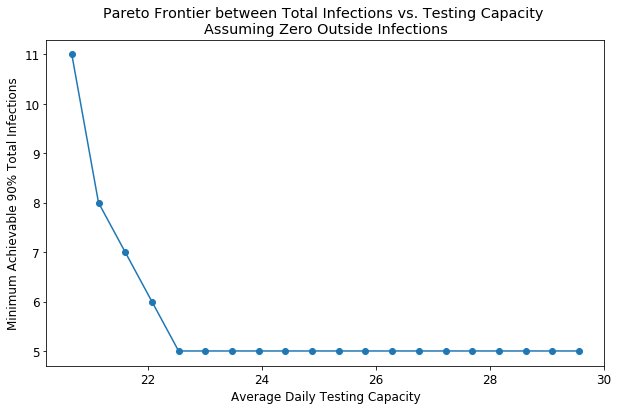

In [53]:
plt.figure(figsize=(10,6))
plt.plot(xs_test_cap, ys_best_inf, marker='o')
plt.xlabel("Average Daily Testing Capacity")
plt.ylabel("Minimum Achievable 90% Total Infections")
plt.title("Pareto Frontier between Total Infections vs. Testing Capacity \n"
         "Assuming Zero Outside Infections")

In [43]:
best_protocols

[(3, 0.3),
 (3, 0.3),
 (5, 0.3),
 (5, 0.3),
 (3, 0.4),
 (3, 0.4),
 (3, 0.4),
 (3, 0.4),
 (3, 0.5),
 (3, 0.6),
 (3, 0.6),
 (3, 0.6),
 (3, 0.6),
 (3, 0.6),
 (3, 0.8),
 (3, 0.8),
 (3, 0.8),
 (3, 0.8),
 (3, 0.8),
 (3, 0.8)]

In [44]:
mapping_to_idx.keys()

dict_keys([(11.3, 0.2, 0.3, 3), (11.3, 0.2, 0.3, 5), (11.3, 0.2, 0.3, 7), (11.3, 0.2, 0.3, 10), (11.3, 0.2, 0.3, 14), (11.3, 0.2, 0.4, 3), (11.3, 0.2, 0.4, 5), (11.3, 0.2, 0.4, 7), (11.3, 0.2, 0.4, 10), (11.3, 0.2, 0.4, 14), (11.3, 0.2, 0.5, 3), (11.3, 0.2, 0.5, 5), (11.3, 0.2, 0.5, 7), (11.3, 0.2, 0.5, 10), (11.3, 0.2, 0.5, 14), (11.3, 0.2, 0.6, 3), (11.3, 0.2, 0.6, 5), (11.3, 0.2, 0.6, 7), (11.3, 0.2, 0.6, 10), (11.3, 0.2, 0.6, 14), (11.3, 0.2, 0.7, 3), (11.3, 0.2, 0.7, 5), (11.3, 0.2, 0.7, 7), (11.3, 0.2, 0.7, 10), (11.3, 0.2, 0.7, 14), (11.3, 0.2, 0.8, 3), (11.3, 0.2, 0.8, 5), (11.3, 0.2, 0.8, 7), (11.3, 0.2, 0.8, 10), (11.3, 0.2, 0.8, 14), (11.3, 0.2, 0.9, 3), (11.3, 0.2, 0.9, 5), (11.3, 0.2, 0.9, 7), (11.3, 0.2, 0.9, 10), (11.3, 0.2, 0.9, 14)])

Text(0.5,1,'distribution of total infections, with parameters:\nhigh-alert test frequency: 30%\nbaseline dorm contacts/day: 11.3')

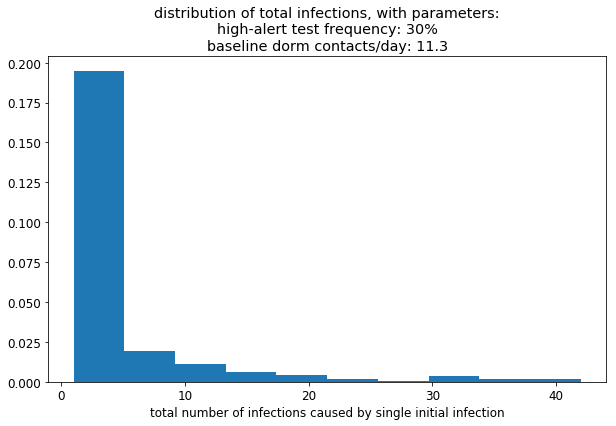

In [48]:
idx = mapping_to_idx[(11.3, 0.2, 0.3, 3)]
t = return_dict[idx]['total_infected']
plt.figure(figsize=(10,6))
plt.hist(t, normed=True)
plt.xlabel("total number of infections caused by single initial infection")
plt.title("distribution of total infections, with parameters:\n" 
          "high-alert test frequency: 30%\n"
          "baseline dorm contacts/day: 11.3")

Text(0.5,1,'distribution of total infections, with parameters:\nhigh-alert test frequency: 70%\nbaseline dorm contacts/day: 11.3')

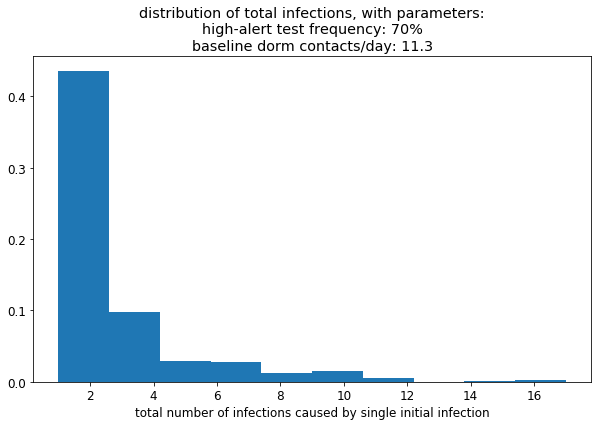

In [49]:
idx = mapping_to_idx[(11.3, 0.2, 0.7, 3)]
t = return_dict[idx]['total_infected']
plt.figure(figsize=(10,6))
plt.hist(t, normed=True)
plt.xlabel("total number of infections caused by single initial infection")
plt.title("distribution of total infections, with parameters:\n" 
          "high-alert test frequency: 70%\n"
          "baseline dorm contacts/day: 11.3")